In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 假设importance.csv包含Feature列和Importance列
csv_file1_path = "C:/Users/Lenovo/Desktop/new_study/CNS/output/Neural_Network_importance.csv"
csv_file2_path = "C:/Users/Lenovo/Desktop/new_study/CNS/data/ASP.csv"

# 读取Features CSV文件
features_df = pd.read_csv(csv_file1_path)
# 读取训练集和Label的CSV文件
training_data_df = pd.read_csv(csv_file2_path)

In [3]:
# ascending=False，降序排列
top_features = features_df.sort_values(by="Importance", ascending=False).head(22)['Feature'].tolist()
print(top_features)

['_ChargeD3100', 'Mw', '_ChargeD3050', '_PolarityD2075', '_SolventAccessibilityD3100', '_HydrophobicityD3001', 'K', 'F', '_NormalizedVDWVD2025', '_NormalizedVDWVD1075', '_SecondaryStrD3100', '_SolventAccessibilityD3075', '_ChargeD1100', '_PolarizabilityD3025', 'W', 'P', '_PolarizabilityD2001', 'charge of all', '_ChargeD3025', '_PolarizabilityD2025', '_PolarizabilityD1025', '_PolarityD3050']


In [4]:
# 从原始数据集中获得前22的列
selected_columns = training_data_df[top_features]
print(selected_columns)

      _ChargeD3100      Mw  _ChargeD3050  _PolarityD2075  \
0            0.000  1477.2         0.000          27.273   
1            0.000  2712.0         0.000           0.000   
2           82.609  2467.6        82.609          82.609   
3            0.000  1569.2         0.000           0.000   
4            0.000  1559.2         0.000           0.000   
...            ...     ...           ...             ...   
1195        79.310  3178.4        24.138          68.966   
1196         0.000  3065.1         0.000          70.370   
1197        88.235  3825.7        44.118          58.824   
1198        90.000  3574.7         6.667          80.000   
1199        97.222  3556.1        55.556          52.778   

      _SolventAccessibilityD3100  _HydrophobicityD3001       K       F  \
0                         54.545                 9.091   9.091  27.273   
1                          0.000                10.000   0.000   0.000   
2                        100.000                 8.696  1

In [5]:
# 获取应变量标签
y = training_data_df["MIC"]
print(y)
y = np.log(y)
print(y)
# 初始化线性回归模型
linear_regressor = LinearRegression()

0         24.00
1         32.00
2        128.00
3          8.00
4         31.25
         ...   
1195    8192.00
1196    8192.00
1197    8192.00
1198    8192.00
1199    8192.00
Name: MIC, Length: 1200, dtype: float64
0       3.178054
1       3.465736
2       4.852030
3       2.079442
4       3.442019
          ...   
1195    9.010913
1196    9.010913
1197    9.010913
1198    9.010913
1199    9.010913
Name: MIC, Length: 1200, dtype: float64


In [6]:
# 划分数据集和测试集
X_train, X_test, y_train, y_test = train_test_split(selected_columns, y, test_size=0.2, random_state=0)
# 初始化标准化器
scaler = StandardScaler()
# 对每一列数据进行标准化
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

print(X_train)
print('---------------------------------------------------------------------------')
print(X_train_standardized)

      _ChargeD3100      Mw  _ChargeD3050  _PolarityD2075  \
867          0.000  1343.1         0.000          53.846   
741         60.784  5886.0        54.902          64.706   
467         70.968  3223.4         6.452          67.742   
442         96.875  3526.0        43.750          81.250   
610         83.333  1367.8         8.333          83.333   
...            ...     ...           ...             ...   
1033        61.538  1509.0        61.538          84.615   
763          0.000  2199.2         0.000          30.000   
835        100.000  1690.2        85.714          78.571   
559         82.353  1886.7        70.588          70.588   
684         90.244  4598.5        90.244          60.976   

      _SolventAccessibilityD3100  _HydrophobicityD3001       K      F  \
867                      100.000                 7.692   7.692  0.000   
741                      100.000                 1.961   3.922  3.922   
467                       90.323                 9.677   3.2

In [7]:
# 拟合模型
linear_regressor.fit(X_train_standardized, y_train)

# 预测模型
y_pred = linear_regressor.predict(X_test_standardized)

In [8]:
# 计算回归分析的评估指标
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印结果
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.3014173306930132
Mean Absolute Error: 1.133681452682516
R-squared: 0.5591691171961665


In [9]:
# 获取特征系数
coefficients = linear_regressor.coef_
coefficients_df = pd.DataFrame({'Feature': top_features, 'Coefficient': coefficients})
# 按照系数降序排列
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
# 打印每个特征的系数
for feature, coef in zip(top_features, coefficients):
    print(f"{feature}: {coef}")

_ChargeD3100: 0.3315591905509365
Mw: -0.05352874103065708
_ChargeD3050: -0.17440663638274256
_PolarityD2075: 0.14026494095904252
_SolventAccessibilityD3100: 0.5470645900181889
_HydrophobicityD3001: -0.1634049647960575
K: -0.24259297500275329
F: -0.23761588270686643
_NormalizedVDWVD2025: 0.16580891169138112
_NormalizedVDWVD1075: 0.16580030679308316
_SecondaryStrD3100: 0.330361718248227
_SolventAccessibilityD3075: -0.16132326462073376
_ChargeD1100: 0.09281430819313673
_PolarizabilityD3025: 0.26662903820205575
W: -0.07510029864697165
P: 0.13040772228591851
_PolarizabilityD2001: -0.2380591386437028
charge of all: -0.6311139613867758
_ChargeD3025: 0.24069615525210947
_PolarizabilityD2025: 0.0033971975173827107
_PolarizabilityD1025: -0.17852762138655395
_PolarityD3050: -0.21295194480269602


In [10]:
coefficients_df.to_csv("C:/Users/Lenovo/Desktop/new_study/CNS/output/Neurnal_Network_regression_coefficients.csv", index=False) #不将 DataFrame 的索引写入到 CSV 文件。

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28072\4088928378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette=colors)


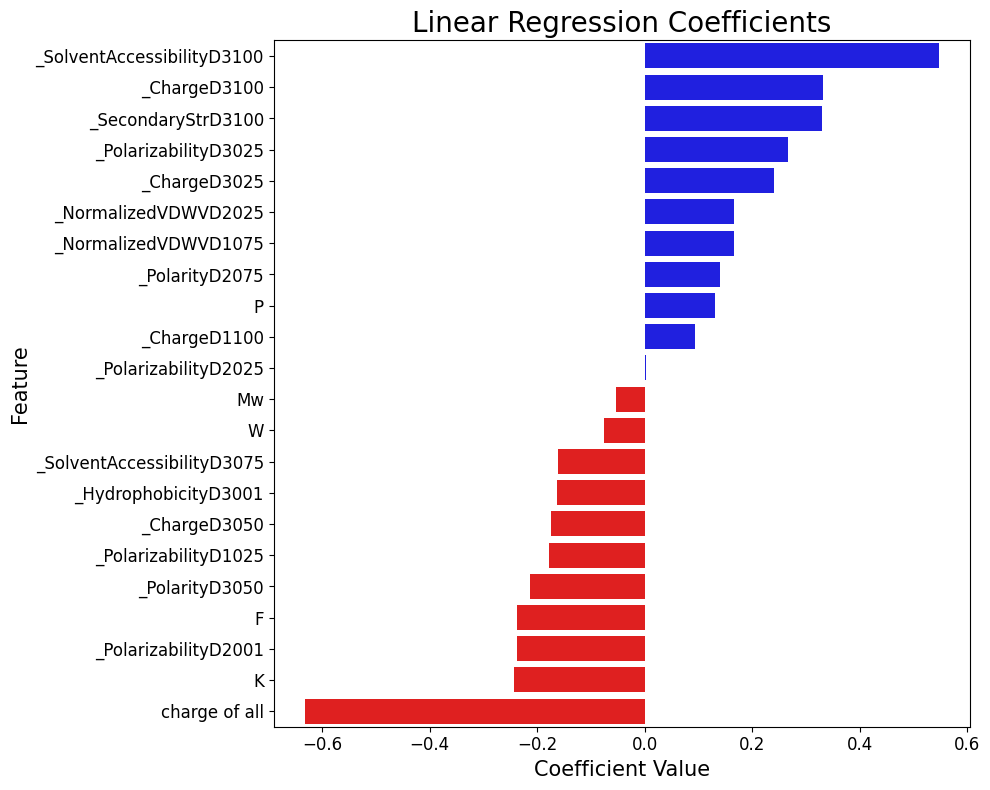

In [12]:
# 按照Coefficient列排序，大的值在上面
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# 设置图形大小
plt.figure(figsize=(10, 8))

# 为正负系数分配颜色
colors = ['b' if coef > 0 else 'r' for coef in coefficients_df['Coefficient']]

# 使用seaborn的barplot函数创建一个横向的柱状图，加入颜色映射
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette=colors)

plt.title('Linear Regression Coefficients', fontsize=20)
plt.xlabel('Coefficient Value', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自动调整布局
plt.tight_layout()

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/Nerual_Network_regression_coefficients_figures.png")

# 显示图形
plt.show()

In [13]:
#获得截距
intercept = linear_regressor.intercept_
print(intercept)
intercept_term = f"{intercept}"
# 构建线性回归方程
equation = " + ".join(f"{row['Coefficient']} * {row['Feature']}" for index, row in coefficients_df.iterrows())
linear_regression_expression = f"y = {equation} + {intercept_term}"
print(linear_regression_expression)

7.87592731037268
y = 0.5470645900181889 * _SolventAccessibilityD3100 + 0.3315591905509365 * _ChargeD3100 + 0.330361718248227 * _SecondaryStrD3100 + 0.26662903820205575 * _PolarizabilityD3025 + 0.24069615525210947 * _ChargeD3025 + 0.16580891169138112 * _NormalizedVDWVD2025 + 0.16580030679308316 * _NormalizedVDWVD1075 + 0.14026494095904252 * _PolarityD2075 + 0.13040772228591851 * P + 0.09281430819313673 * _ChargeD1100 + 0.0033971975173827107 * _PolarizabilityD2025 + -0.05352874103065708 * Mw + -0.07510029864697165 * W + -0.16132326462073376 * _SolventAccessibilityD3075 + -0.1634049647960575 * _HydrophobicityD3001 + -0.17440663638274256 * _ChargeD3050 + -0.17852762138655395 * _PolarizabilityD1025 + -0.21295194480269602 * _PolarityD3050 + -0.23761588270686643 * F + -0.2380591386437028 * _PolarizabilityD2001 + -0.24259297500275329 * K + -0.6311139613867758 * charge of all + 7.87592731037268


In [14]:
# 使用生成的表达式进行回归值的预测
def predict_regression_value(features, coefficients):
    return features @ coefficients + intercept

selected_regression_features = coefficients_df['Feature'].tolist()

selected_regression_features_value = training_data_df[selected_regression_features]

coefficients_list = coefficients_df['Coefficient'].tolist()
coefficients_array = np.array(coefficients_list)

# 初始化标准化器
scaler = StandardScaler()
# 对每一列数据进行标准化
selected_regression_features_value_standardized = scaler.fit_transform(selected_regression_features_value)
#print(selected_regression_features_value)
#print(selected_regression_features_value_standardized)


In [15]:
predicted_regression_value = predict_regression_value(selected_regression_features_value_standardized, coefficients_array)

predicted_regression_value_df = pd.DataFrame({'Value':predicted_regression_value})
print(predicted_regression_value_df)


          Value
0      4.211167
1      3.184901
2      7.633757
3      2.607794
4      3.739097
...         ...
1195   8.747599
1196   7.867830
1197   8.913191
1198   8.152569
1199  10.661443

[1200 rows x 1 columns]


In [16]:
# 从原始数据集中获取LABEL
LABEL_values = pd.DataFrame({'LABEL':training_data_df['LABEL']})
# print(LABEL_values)
# 合并两个DataFrame
merged_df = pd.concat([predicted_regression_value_df, LABEL_values], axis=1)

# 划分两类
AMP_predicted = merged_df[merged_df['LABEL'] == 1]
NON_AMP_predicted = merged_df[merged_df['LABEL'] == 0]

#扔掉非零项
AMP_predicted_clean = AMP_predicted.dropna()
NON_AMP_predicted_clean = NON_AMP_predicted.dropna()

# 求"Value"列的平均值
average_value = AMP_predicted_clean['Value'].mean()

print(AMP_predicted_clean)
print(NON_AMP_predicted_clean)
#print(average_value)

        Value  LABEL
0    4.211167      1
1    3.184901      1
2    7.633757      1
3    2.607794      1
4    3.739097      1
..        ...    ...
201  4.860429      1
202  4.792094      1
203  5.350454      1
204  5.090772      1
205  5.146536      1

[206 rows x 2 columns]
          Value  LABEL
206    9.251275      0
207    7.273390      0
208    9.583700      0
209    9.082466      0
210    9.103374      0
...         ...    ...
1195   8.747599      0
1196   7.867830      0
1197   8.913191      0
1198   8.152569      0
1199  10.661443      0

[994 rows x 2 columns]


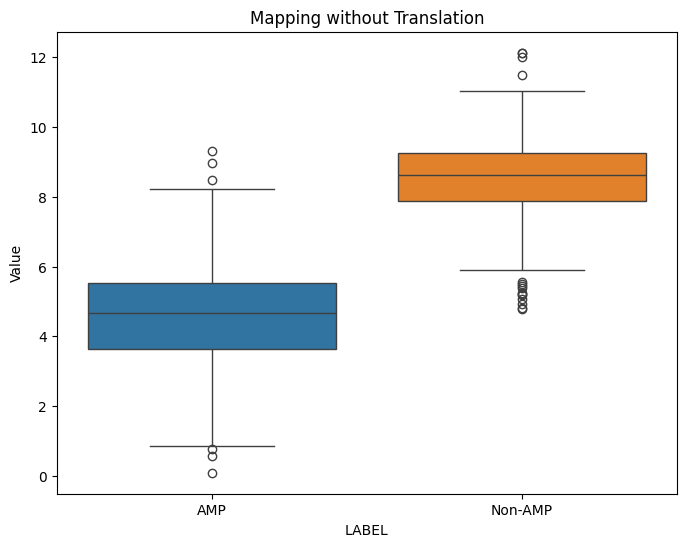

In [18]:
# 合并两个DataFrame
merged_final_df = pd.concat([AMP_predicted_clean, NON_AMP_predicted_clean], ignore_index=True)
merged_final_df['LABEL'] = merged_final_df['LABEL'].replace({0: 'Non-AMP', 1: 'AMP'})
# 使用Seaborn绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='LABEL', y='Value', hue='LABEL', data=merged_final_df)
plt.title('Mapping without Translation')

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/Nerual_Network_regression_boxplot_figures.png")

plt.show()